<a href="https://colab.research.google.com/github/sunitha-18577/Python-Fundamentals/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('/content/Mushroom.csv')
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

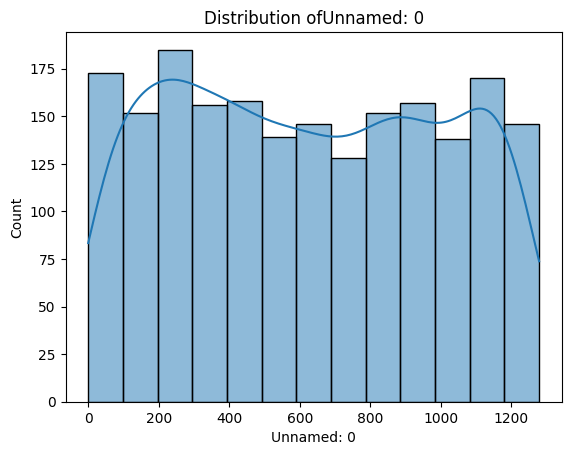

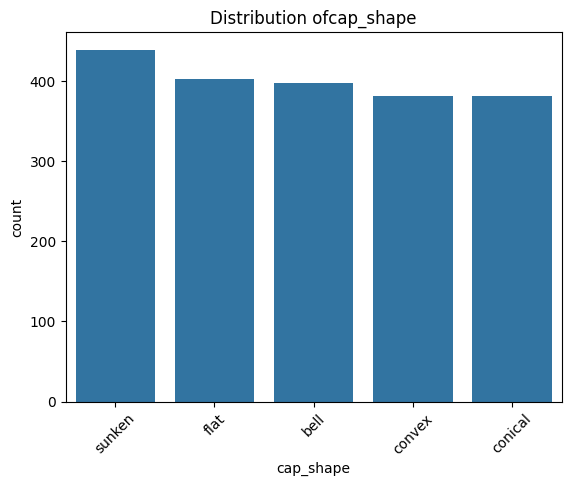

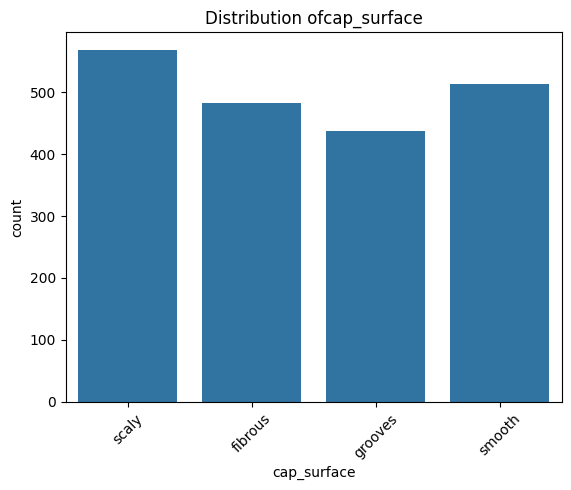

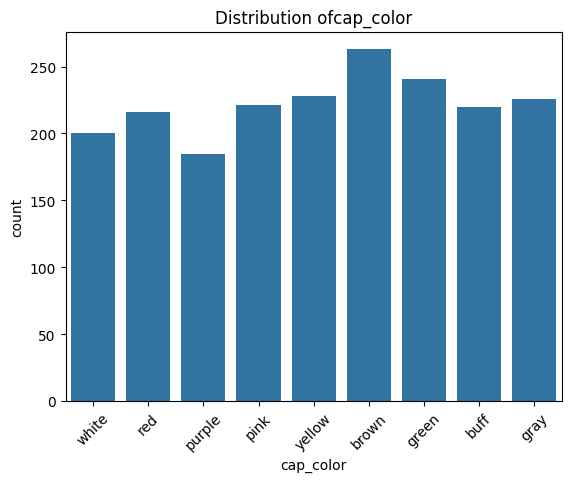

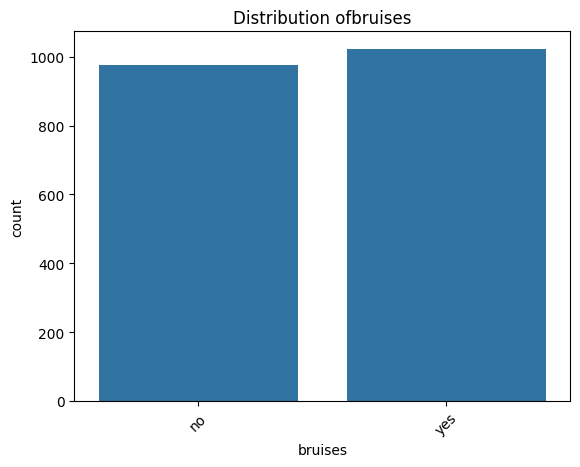

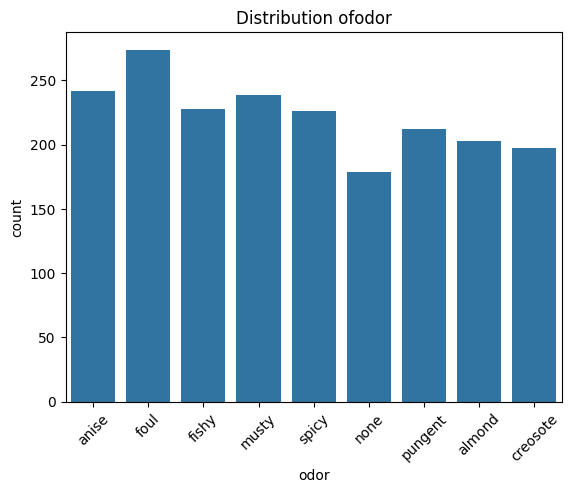

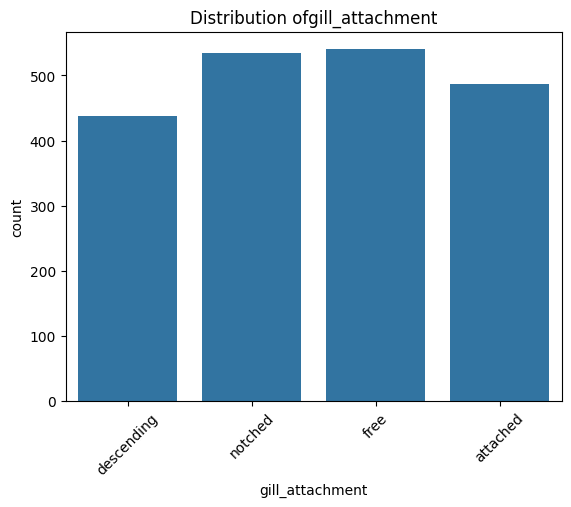

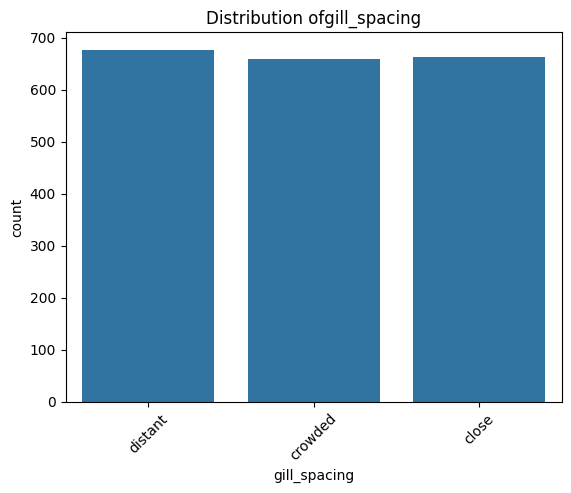

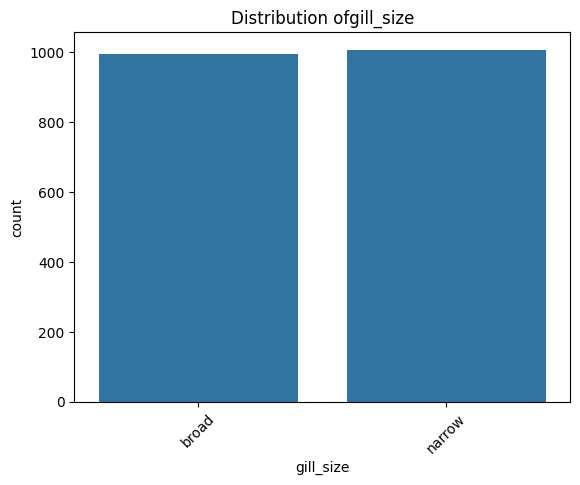

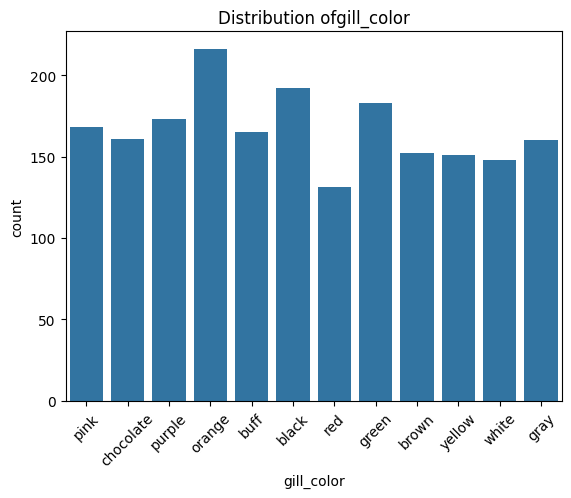

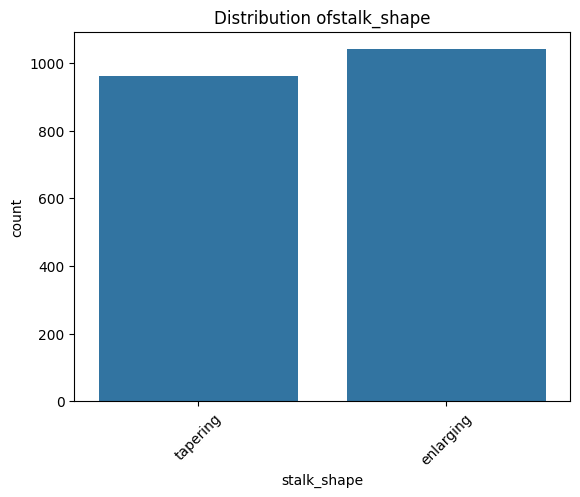

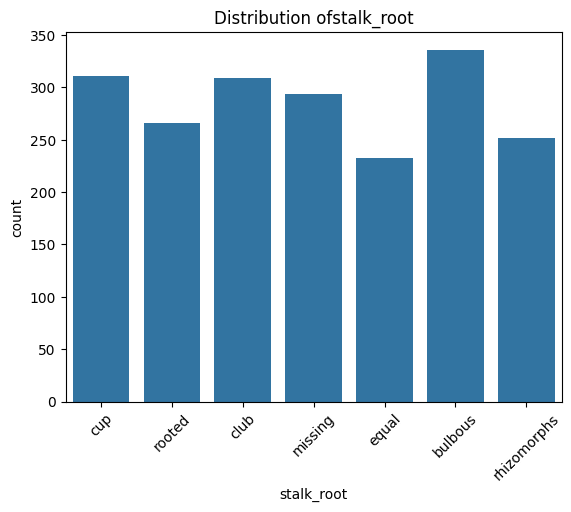

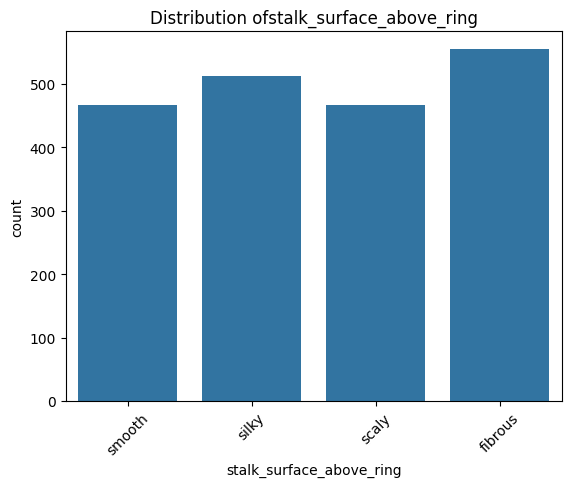

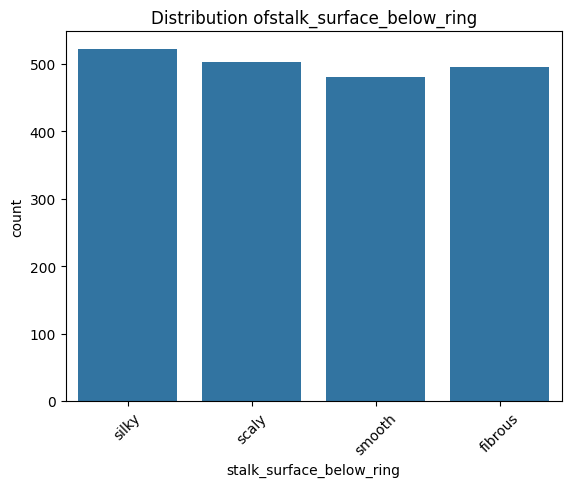

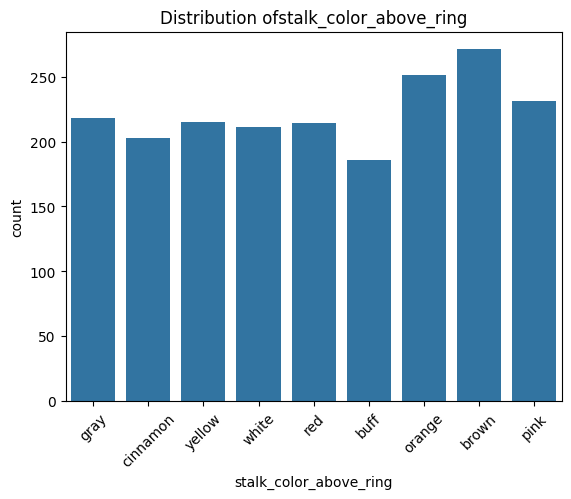

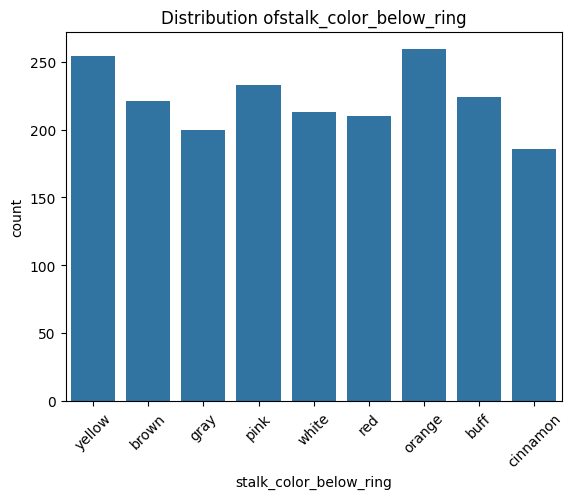

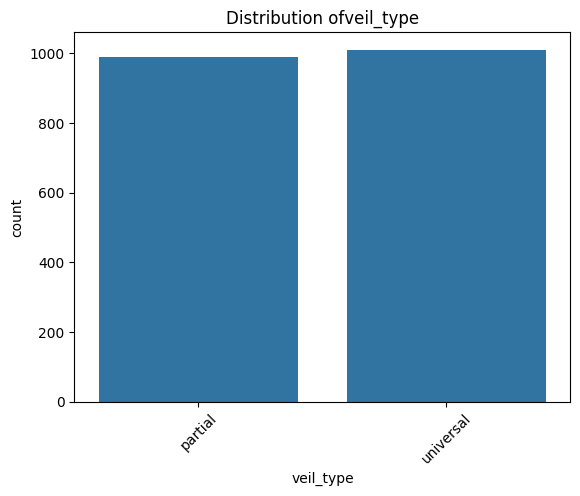

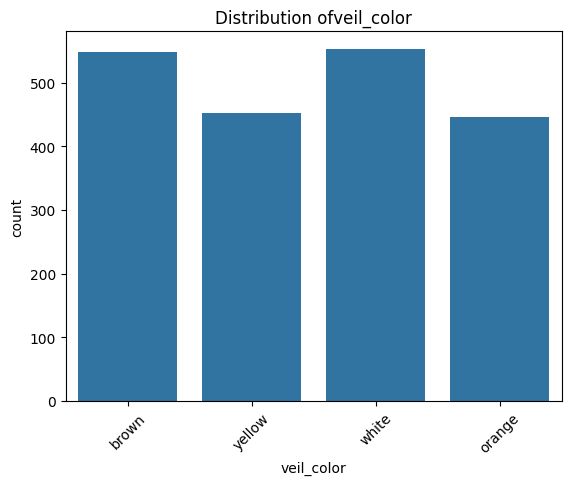

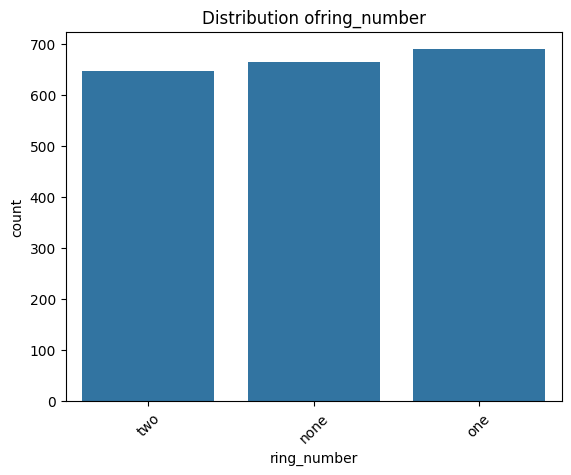

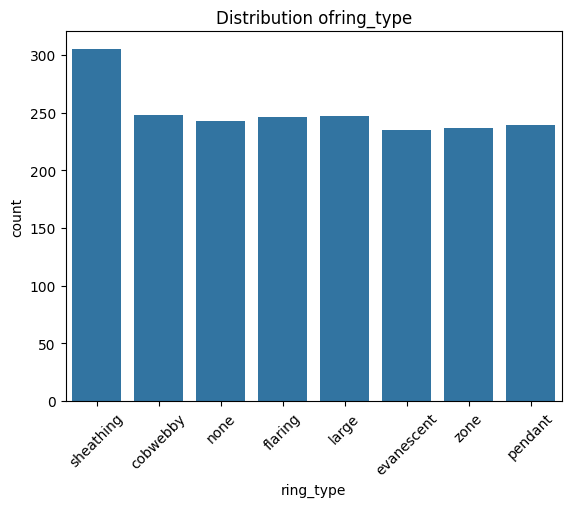

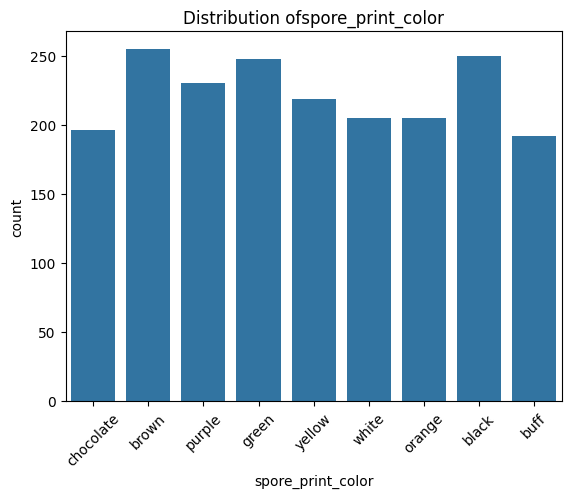

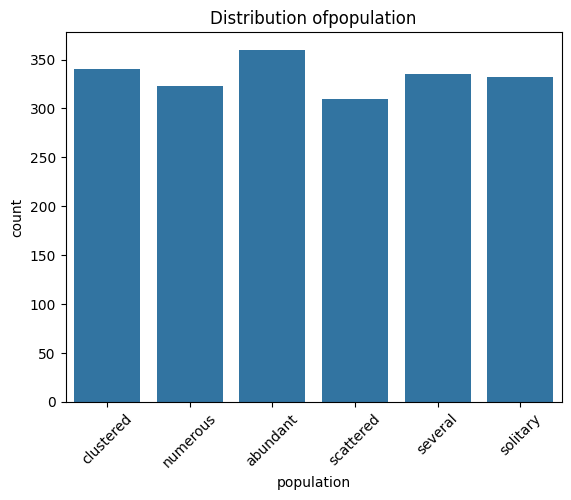

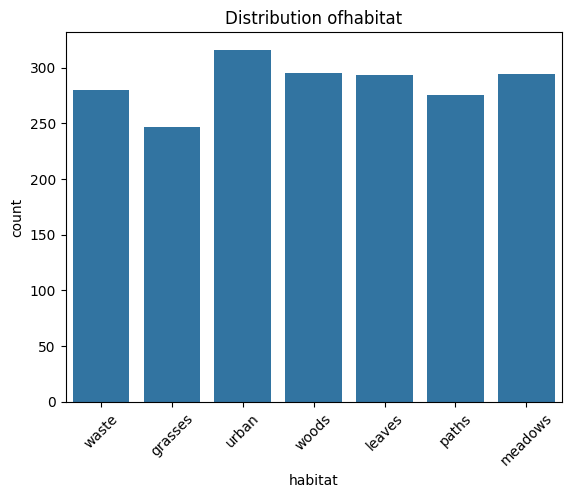

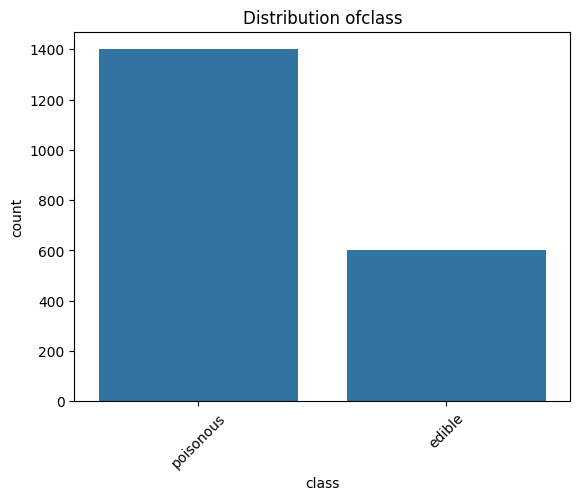

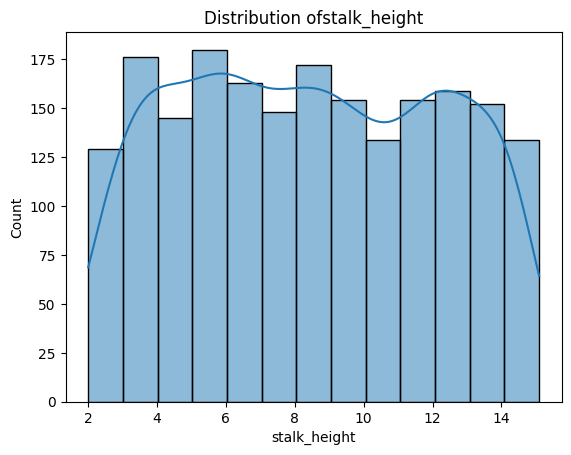

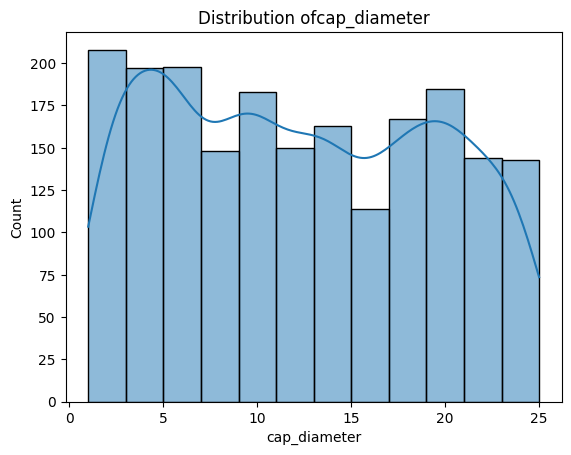

In [ ]:
for column in df.columns:
  if df[column].dtype!=object:
    plt.figure()
    sns.histplot(df[column],kde=True)
    plt.title(f'Distribution of{column}')
    plt.show()
  else:
    plt.figure()
    sns.countplot(x=column,data=df)
    plt.title(f'Distribution of{column}')
    plt.xticks(rotation=45)
    plt.show()

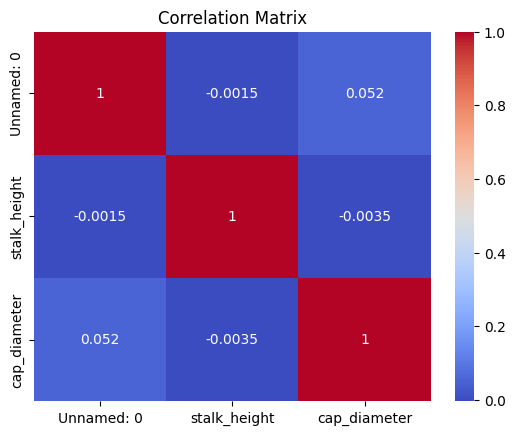

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for column in df.columns:
  if df[column].dtype==object:
    df[column]=label_encoder.fit_transform(df[column])
print(df.head())

   Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0        1167          4            2          7        0     1   
1        1037          4            0          6        0     1   
2         309          3            1          5        1     4   
3         282          0            2          4        1     3   
4         820          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3         

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('class',axis=1)
y=df['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

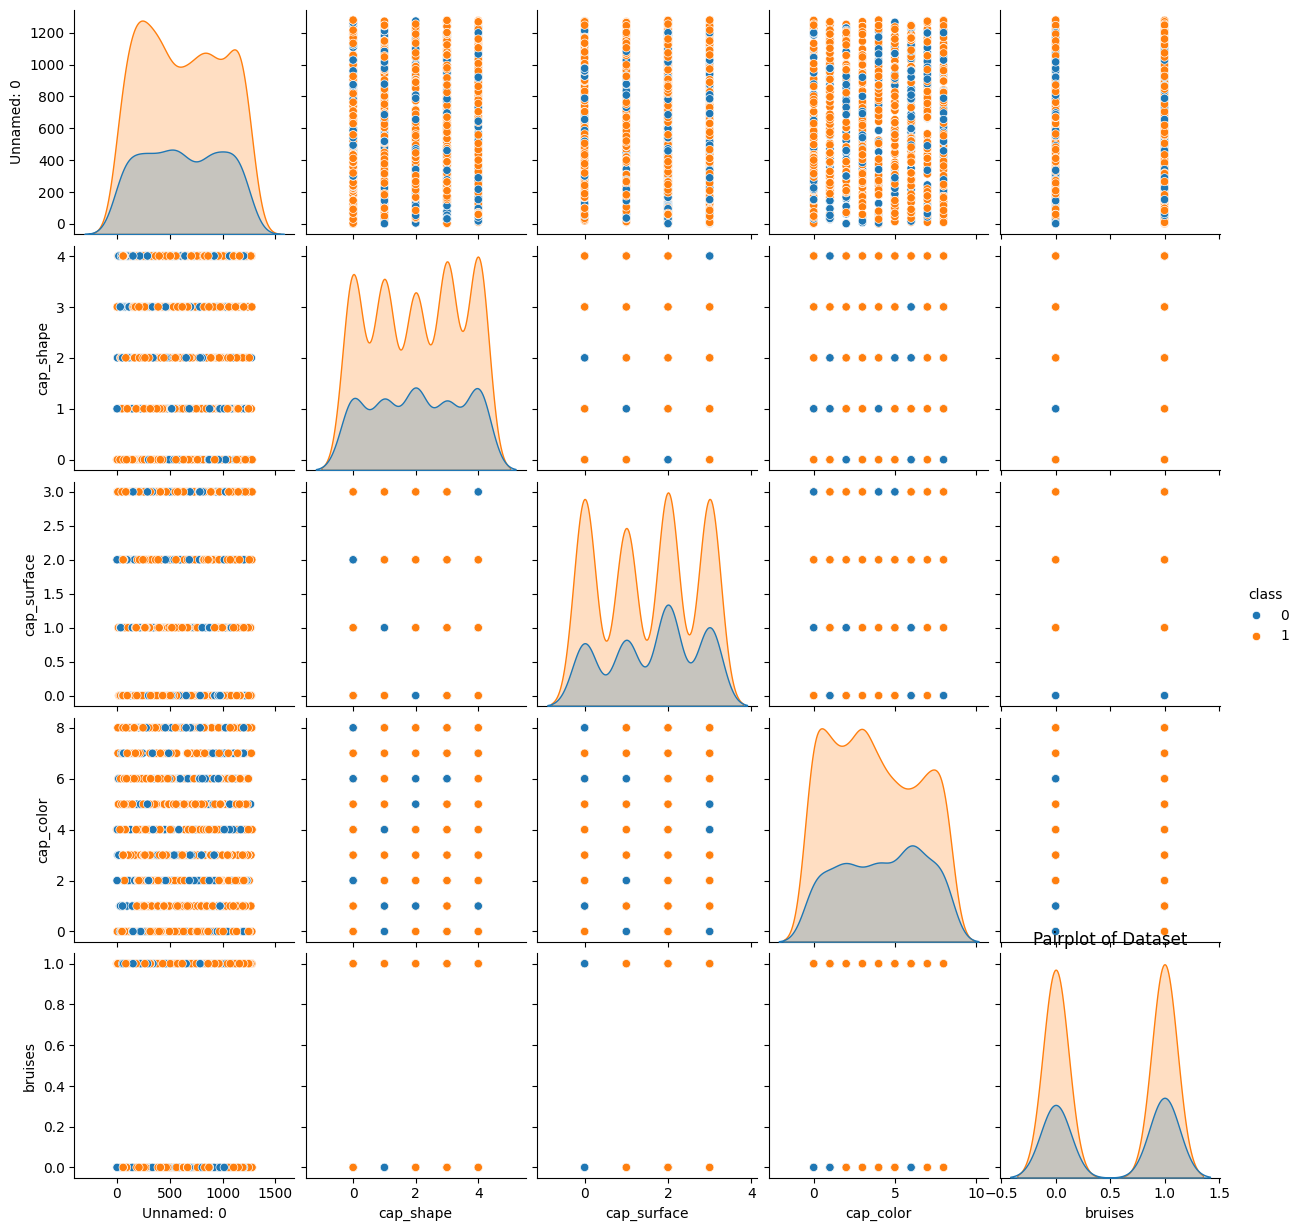

In [ ]:
sns.pairplot(df,hue='class',vars=df.columns[:5])
plt.title('Pairplot of Dataset')
plt.show()

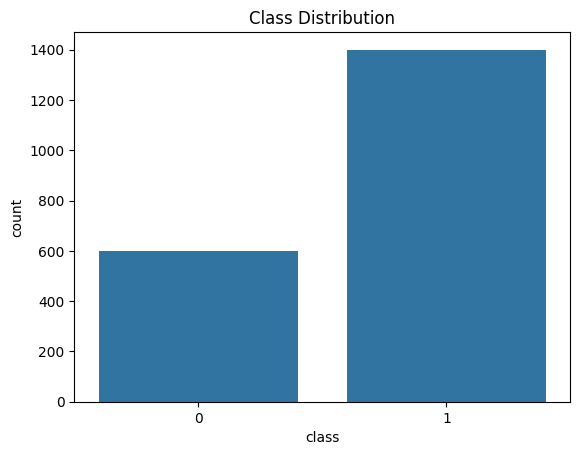

In [ ]:
sns.countplot(x='class',data=df)
plt.title('Class Distribution')
plt.show()

In [ ]:
for column in df.columns:
  if df[column].dtype==object:
    df[column]=label_encoder.fit_transform(df[column])


In [ ]:
print(df.head())


   Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0        1167          4            2          7        0     1   
1        1037          4            0          6        0     1   
2         309          3            1          5        1     4   
3         282          0            2          4        1     3   
4         820          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3         

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
y_pred=svm_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f'Accuracy:{accuracy}')
print(f'Precision:{precision}')
print(f'Recall:{recall}')
print(f'F1 Score:{f1}')

Accuracy:0.6675
Precision:0.6675
Recall:1.0
F1 Score:0.800599700149925


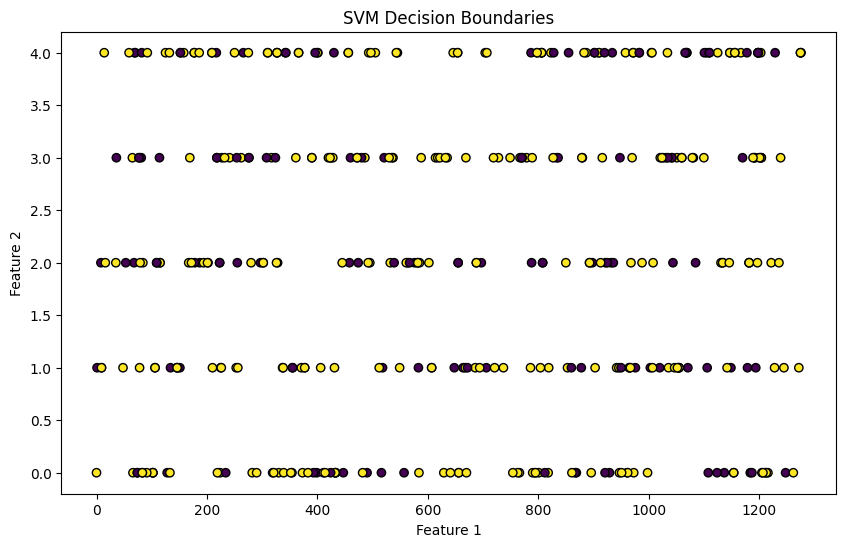

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,cmap='viridis',edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundaries')
plt.show()

In [ ]:
svm_rbf=SVC(kernel='rbf',C=10,gamma=0.1)
svm_rbf.fit(x_train,y_train)
y_pred_rbf=svm_rbf.predict(x_test)
accuracy_rbf=accuracy_score(y_test,y_pred_rbf)
print("RBF Accuracy:",accuracy_rbf)

RBF Accuracy: 0.885


In [ ]:
kernels=['linear','poly','rbf','sigmoid']
for kernel in kernels:
  svm_model=SVC(kernel=kernel,random_state=42)
  svm_model.fit(x_train,y_train)

In [ ]:
print("Practical implication on SVM in Real-world Classification:")
print("1.Ice Cream classification:SVM can classify icecream flavours based on ingredients and sensory data.")
print("2.Real wood classification:SVM can classify wood types vased on texture ,grain,and chemical composition.")
print("SVM's strength lies in its ability to andel high-dimensional data ,but its weakness is its sensitivity to parameter tuning.")